***Linear regression calculation for the website dataset***

A new dataset named website has been loaded for you in the workspace containing simulated data for a sample of visitors to a website, including the amount of time in seconds they spent on the website (time_seconds), their age (age), and information about whether they accessed the website using Chrome or Safari (browser).

First let's load libraries and examine dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Read in the data
website = pd.read_csv('website.csv')

# Print the first five rows
print(website.head())

   time_seconds   age browser
0         486.0  47.1  Safari
1         645.7  64.6  Chrome
2         345.0  45.4  Safari
3         413.4  34.4  Chrome
4         426.4  31.3  Safari


1. Create a plot of time_seconds (vertical axis) versus age (horizontal axis). Is there a linear relationship between these variables?

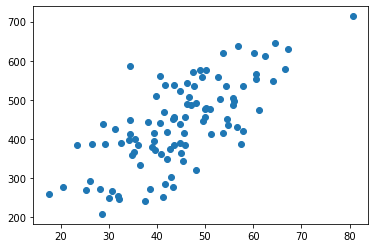

<Figure size 432x288 with 0 Axes>

In [3]:
plt.scatter(website.age, website.time_seconds)
# Show then clear plot
plt.show()
plt.clf()

2. Fit a linear model to predict time_seconds using the age variable

In [4]:
model = sm.OLS.from_formula('time_seconds ~ age', data = website)
results = model.fit()
print(results.params)

Intercept    128.967945
age            6.913758
dtype: float64


3. Use the coefficients from the linear model to plot the regression line on top of your original plot.

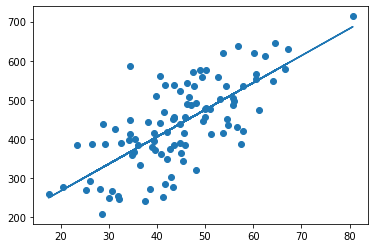

<Figure size 432x288 with 0 Axes>

In [5]:
predicted_time = results.params[1]*website.age + results.params[0]
plt.scatter(website.age, website.time_seconds)
plt.plot(website.age, predicted_time)
# Show then clear plot
plt.show()
plt.clf()

4. Calculate the fitted values and residuals

In [6]:
fitted_values = results.predict(website)
print(fitted_values)
# Calculate residuals
residuals = website.time_seconds - fitted_values
print(residuals)

0     454.605928
1     575.596686
2     442.852540
3     366.801206
4     345.368558
         ...    
95    429.716401
96    545.176152
97    440.778413
98    290.749873
99    395.838988
Length: 100, dtype: float64
0      31.394072
1      70.103314
2     -97.852540
3      46.598794
4      81.031442
         ...    
95     26.983599
96     73.923848
97    -76.478413
98     94.550127
99   -124.138988
Length: 100, dtype: float64


5. Check the normality assumption by plotting a histogram of the residuals. Are they approximately normally distributed?

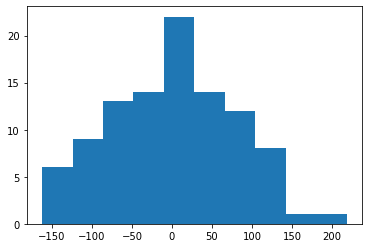

These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.


<Figure size 432x288 with 0 Axes>

In [7]:
plt.hist(residuals)
# Show then clear the plot
plt.show()
plt.clf()
print("These residuals appear normally distributed, leading us to conclude that the normality assumption is satisfied.")

6. Check the homoscedasticity assumption by plotting a the residuals against the fitted values. Is this assumption satisfied?

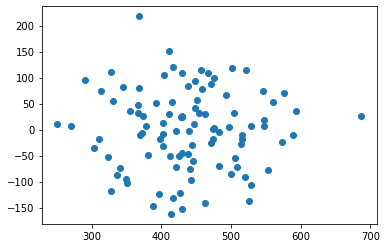

The homoscedasticity assumption is met, this plot looks like a random splatter of points, centered around y=0


<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(fitted_values,residuals)
# Show then clear the plot
plt.show()
plt.clf()
print("The homoscedasticity assumption is met, this plot looks like a random splatter of points, centered around y=0")

7. Use your model to predict the amount of time that a 40 year old person will spend on the website.

In [10]:
pred_40y = results.predict({'age':[40]})
print("40 years old person will spend around {} seconds".format(round(pred_40y[0],1)))

40 years old person will spend around 405.5 seconds


8. Fit another model that predicts time_seconds based on browser.

In [11]:
model1 = sm.OLS.from_formula('time_seconds ~ browser', data = website)
results1 = model1.fit()
print(results1.params)

Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64


9. Print out the coefficients. What is the difference in average time spent on each browser?

In [18]:
print(website.groupby('browser').mean().time_seconds)
print("Mean difference between two browsers is {} seconds".format(round(results1.params[1],1)))
print("On average visitors who uses Chrome browser spent 99.1 seconds more than visitors who uses Safari")

browser
Chrome    489.704255
Safari    390.647170
Name: time_seconds, dtype: float64
Mean difference between two browsers is -99.1 seconds
On average visitors who uses Chrome browser spent 99.1 seconds more than visitors who uses Safari
